In [1]:
import pandas as pd

In [2]:
d = pd.read_csv('bank-full.csv')
d

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
d.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
d.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Encoding the data in categorical columns

### For variables that have only two different categories in the columns

In [7]:
columns = ['default','housing','loan','Target']

def encode(column):
    return column.map({'yes':1,'no':0})

d[columns] = d[columns].apply(encode)

In [8]:
categorical = d.select_dtypes(include=['object'])
categorical.head()

,job,marital,education,contact,month,poutcome
0,management,married,tertiary,unknown,may,unknown
1,technician,single,secondary,unknown,may,unknown
2,entrepreneur,married,secondary,unknown,may,unknown
3,blue-collar,married,unknown,unknown,may,unknown
4,unknown,single,unknown,unknown,may,unknown


In [9]:
# dummy variables of all categorical columns
dummies = pd.get_dummies(categorical,drop_first=True)
dummies.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [10]:
# concatination of two dataframes main dataframe and the dummies dataframe
d = pd.concat([d,dummies],axis=1)
d.drop(columns=categorical.columns,axis=1,inplace=True)

In [11]:
d.shape

(45211, 43)

In [12]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  Target               45211 non-null  int64
 11  job_blue-collar      45211 non-null  uint8
 12  job_entrepreneur     45211 non-null  uint8
 13  job_housemaid        45211 non-null  uint8
 14  job_management       45211 non-null  uint8
 15  job_retired          45211 non-null  uint8
 16  job_self-employed    4

## Outlier Detection

In [13]:
num_cols = d[['age','balance','day','duration','campaign','pdays','previous']]
num_cols.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [14]:
num_cols.describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.99])

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
90%,56.000000,3574.000000,28.000000,548.000000,5.000000,185.000000,2.000000
95%,59.000000,5768.000000,29.000000,751.000000,8.000000,317.000000,3.000000
99%,71.000000,13164.900000,31.000000,1269.000000,16.000000,370.000000,8.900000


### Boxplots for all the numerical columns

<Axes: ylabel='previous'>

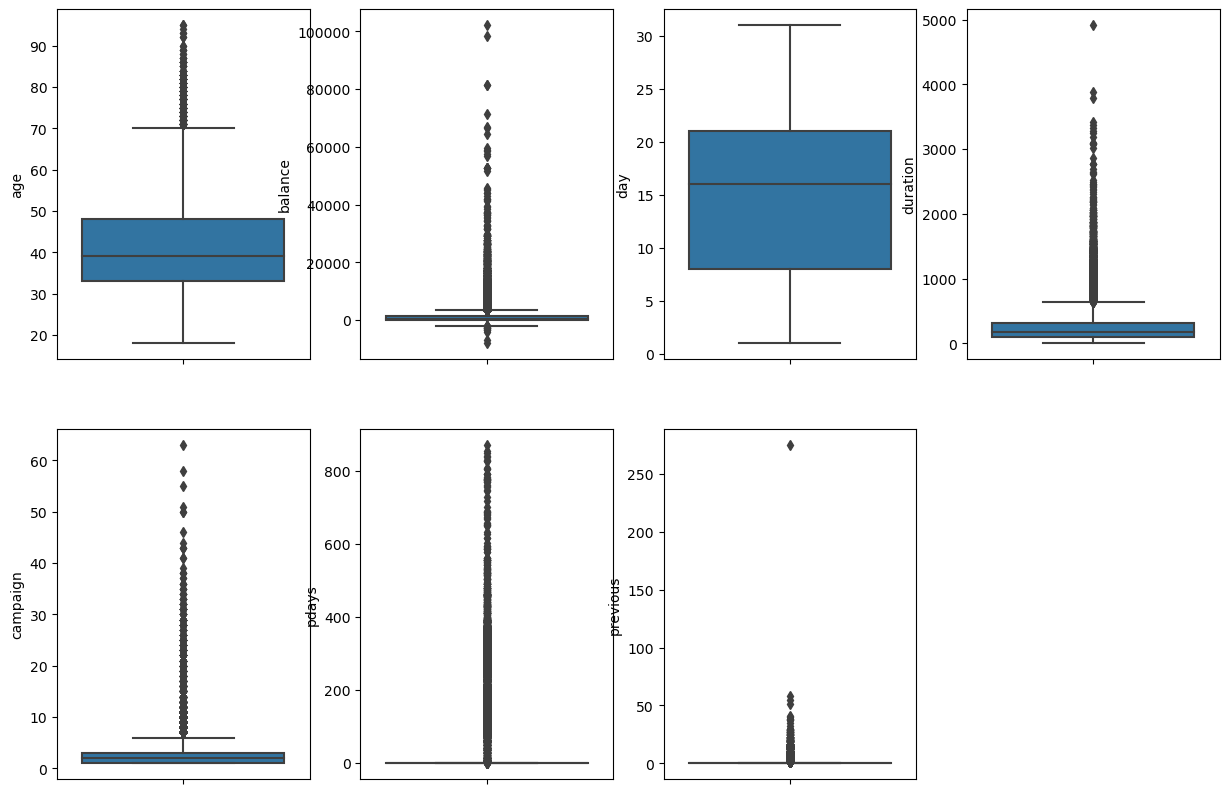

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
plt.subplot(2,4,1)
sns.boxplot(y='age',data=d)
plt.subplot(2,4,2)
sns.boxplot(y='balance',data=d)
plt.subplot(2,4,3)
sns.boxplot(y='day',data=d)
plt.subplot(2,4,4)
sns.boxplot(y='duration',data=d)
plt.subplot(2,4,5)
sns.boxplot(y='campaign',data=d)
plt.subplot(2,4,6)
sns.boxplot(y='pdays',data=d)
plt.subplot(2,4,7)
sns.boxplot(y='previous',data=d)

<Axes: ylabel='previous'>

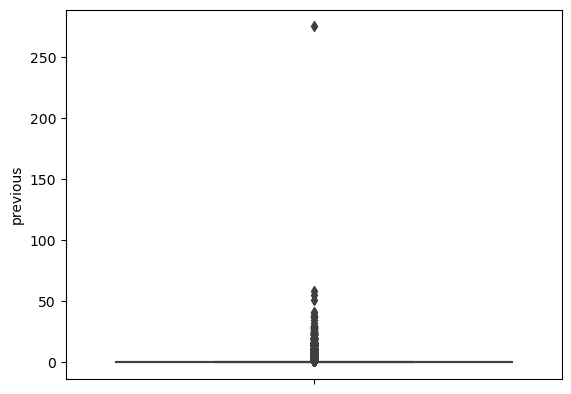

In [19]:
sns.boxplot(y='previous',data=d)

The ***previous*** and ***pdays*** columns are having incredible amount of outliers and the data is totally messed up.

For the ***previous*** column are the upper limit is 1.5 and lower limit is -1.5. All the outliers are above the upper limit. We can either compress all the outliers and make them equal to the upper limit. Or we can ignore this column for the analysis.

The same thing can be said about the ***pdays*** column as well. The inconsistency in this column is even higher. So, I am dropping these two columns from the dataframe.

In [22]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
ss_num = SS.fit_transform(num_cols)
ss_num = pd.DataFrame(ss_num)
ss_num.columns = list(num_cols)

In [23]:
ss_num

,age,balance,day,duration,campaign,pdays,previous
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.251940
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.251940
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.251940
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.251940
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.251940
...,...,...,...,...,...,...,...
45206,0.947747,-0.176460,0.143418,2.791329,0.076230,-0.411453,-0.251940
45207,2.831227,0.120447,0.143418,0.768224,-0.246560,-0.411453,-0.251940
45208,2.925401,1.429593,0.143418,3.373797,0.721811,1.436189,1.050473
45209,1.512791,-0.228024,0.143418,0.970146,0.399020,-0.411453,-0.251940


<Axes: ylabel='previous'>

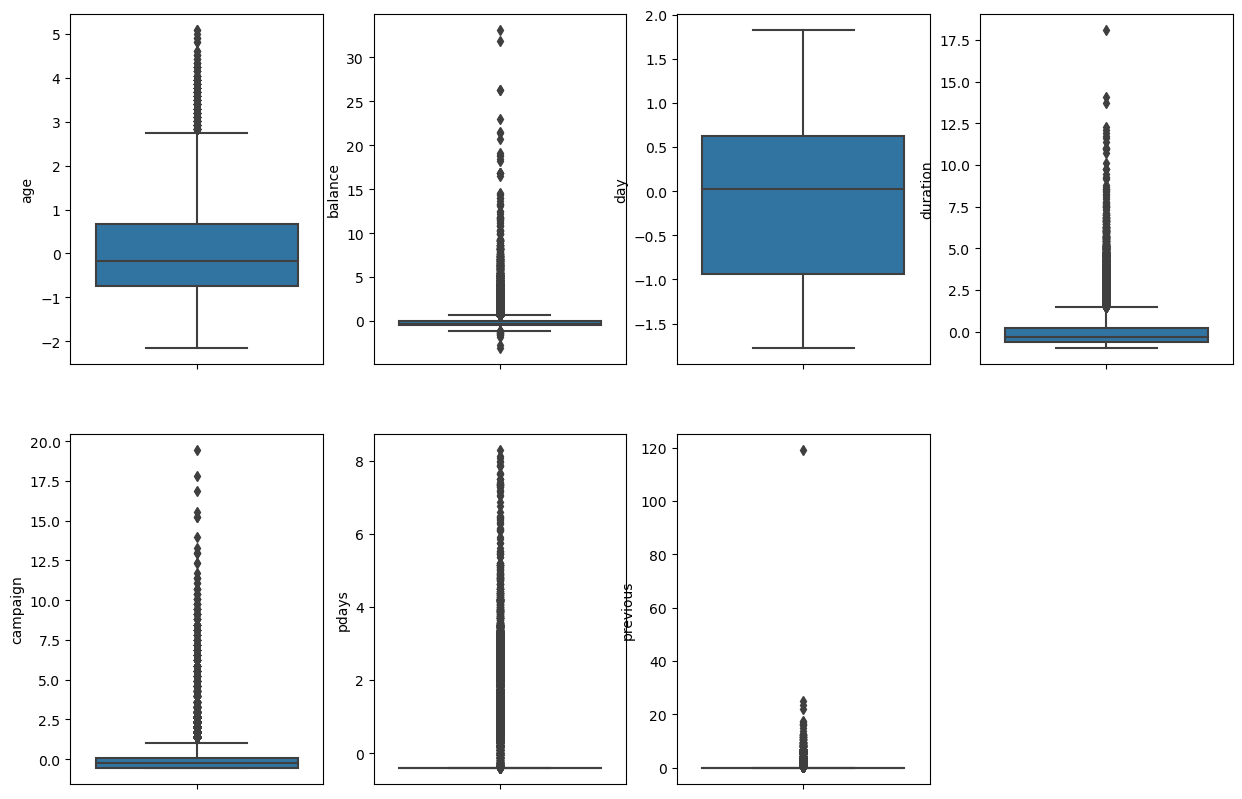

In [24]:
plt.figure(figsize=(15,10))
plt.subplot(2,4,1)
sns.boxplot(y='age',data=ss_num)
plt.subplot(2,4,2)
sns.boxplot(y='balance',data=ss_num)
plt.subplot(2,4,3)
sns.boxplot(y='day',data=ss_num)
plt.subplot(2,4,4)
sns.boxplot(y='duration',data=ss_num)
plt.subplot(2,4,5)
sns.boxplot(y='campaign',data=ss_num)
plt.subplot(2,4,6)
sns.boxplot(y='pdays',data=ss_num)
plt.subplot(2,4,7)
sns.boxplot(y='previous',data=ss_num)

In [25]:
from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler()
mm_num = MM.fit_transform(ss_num)
mm_num = pd.DataFrame(mm_num)
mm_num.columns = list(num_cols)

In [26]:
mm_num

,age,balance,day,duration,campaign,pdays,previous
0,0.519481,0.092259,0.133333,0.053070,0.000000,0.000000,0.000000
1,0.337662,0.073067,0.133333,0.030704,0.000000,0.000000,0.000000
2,0.194805,0.072822,0.133333,0.015453,0.000000,0.000000,0.000000
3,0.376623,0.086476,0.133333,0.018707,0.000000,0.000000,0.000000
4,0.194805,0.072812,0.133333,0.040260,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
45206,0.428571,0.080293,0.533333,0.198658,0.032258,0.000000,0.000000
45207,0.688312,0.088501,0.533333,0.092721,0.016129,0.000000,0.000000
45208,0.701299,0.124689,0.533333,0.229158,0.064516,0.212156,0.010909
45209,0.506494,0.078868,0.533333,0.103294,0.048387,0.000000,0.000000


<Axes: ylabel='previous'>

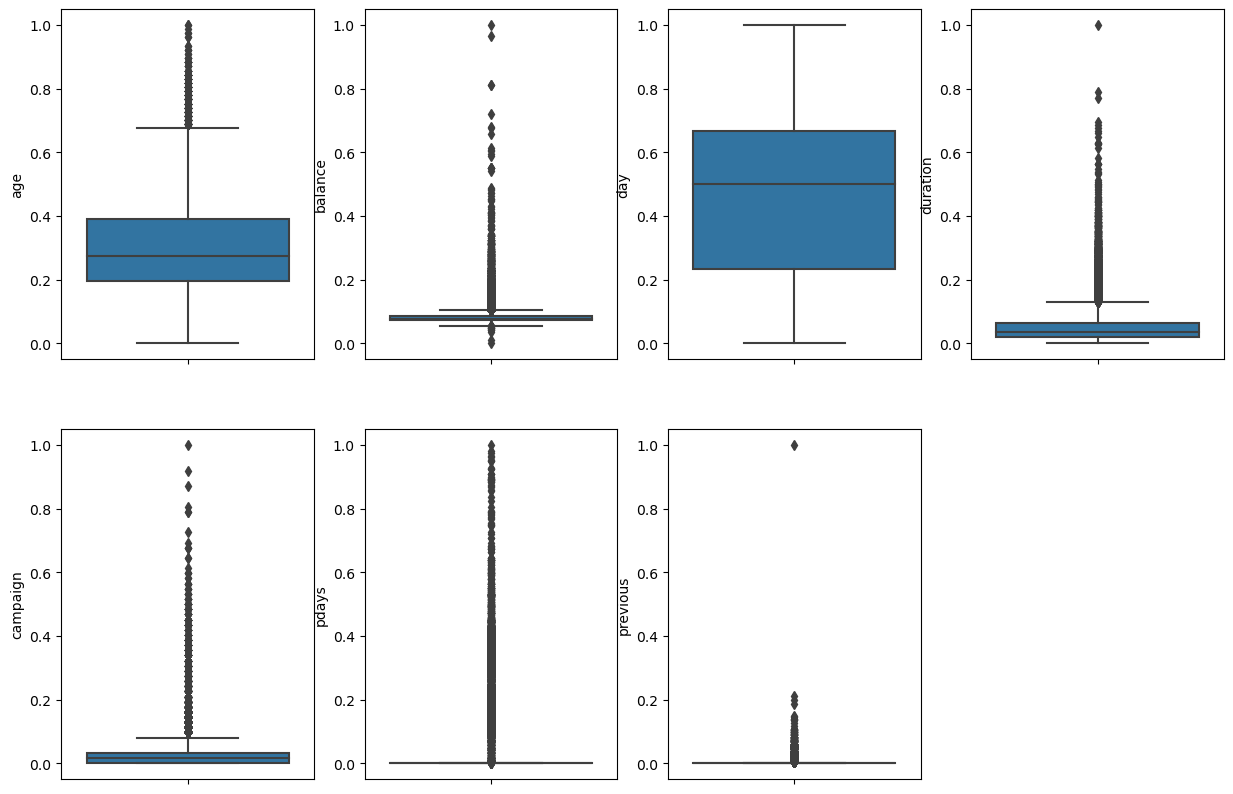

In [27]:
plt.figure(figsize=(15,10))
plt.subplot(2,4,1)
sns.boxplot(y='age',data=mm_num)
plt.subplot(2,4,2)
sns.boxplot(y='balance',data=mm_num)
plt.subplot(2,4,3)
sns.boxplot(y='day',data=mm_num)
plt.subplot(2,4,4)
sns.boxplot(y='duration',data=mm_num)
plt.subplot(2,4,5)
sns.boxplot(y='campaign',data=mm_num)
plt.subplot(2,4,6)
sns.boxplot(y='pdays',data=mm_num)
plt.subplot(2,4,7)
sns.boxplot(y='previous',data=mm_num)

The variable that are having high skewness are the pdays, previous, campaign, balance. But these could be important for the model training. So let's check with each possible scenario with all the data and by dropping these columns one by one.

In [28]:
d[['age','balance','day','duration','campaign','pdays','previous']] = SS.fit_transform(d[['age','balance','day','duration','campaign','pdays','previous']])

In [29]:
d.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,1.606965,0,0.256419,1,0,-1.298476,0.011016,-0.569351,-0.411453,-0.25194,...,0,0,0,1,0,0,0,0,0,1
1,0.288529,0,-0.437895,1,0,-1.298476,-0.416127,-0.569351,-0.411453,-0.25194,...,0,0,0,1,0,0,0,0,0,1
2,-0.747384,0,-0.446762,1,1,-1.298476,-0.707361,-0.569351,-0.411453,-0.25194,...,0,0,0,1,0,0,0,0,0,1
3,0.571051,0,0.047205,1,0,-1.298476,-0.645231,-0.569351,-0.411453,-0.25194,...,0,0,0,1,0,0,0,0,0,1
4,-0.747384,0,-0.447091,0,0,-1.298476,-0.233620,-0.569351,-0.411453,-0.25194,...,0,0,0,1,0,0,0,0,0,1


In [31]:
x = d.drop(['Target'], axis = 1)
y = d['Target']

## Model Training

### Model 1 -  All the columns

In [33]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x, y)

LogisticRegression()

In [37]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y, clf.predict(x)))
print('\n')
print(accuracy_score(y, clf.predict(x)).round(3))
print('\n')
print(classification_report(y, clf.predict(x)))

[[38945   977]
 [ 3459  1830]]


0.902


              precision    recall  f1-score   support

           0       0.92      0.98      0.95     39922
           1       0.65      0.35      0.45      5289

    accuracy                           0.90     45211
   macro avg       0.79      0.66      0.70     45211
weighted avg       0.89      0.90      0.89     45211



Area under the curve is 0.908


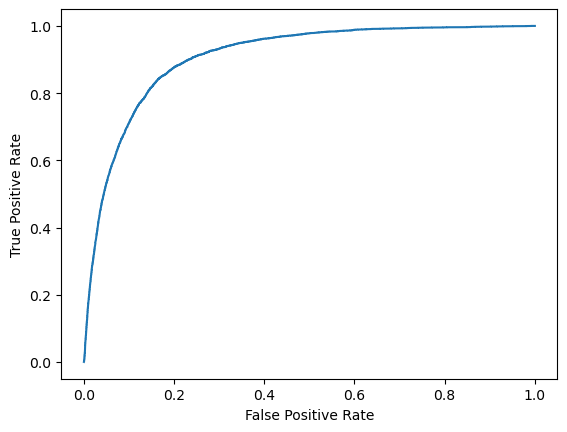

In [56]:
from sklearn.metrics import roc_curve, roc_auc_score
pred_prob = clf.predict_proba(x)[:,1]
fpr, tpr, thresholds = roc_curve(y, pred_prob)
print('Area under the curve is', roc_auc_score(y, pred_prob).round(3))

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Model 2 - Drop pdays and previous columns

In [39]:
x1 = x.drop(['pdays', 'previous'], 1)

C:\Users\harivars\AppData\Local\Temp\ipykernel_9100\4129767325.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x1 = x.drop(['pdays', 'previous'], 1)


In [40]:
clf1 = LogisticRegression()
clf1.fit(x1, y)

LogisticRegression()

In [41]:
print(confusion_matrix(y, clf1.predict(x1)))
print('\n')
print(accuracy_score(y, clf1.predict(x1)).round(3))
print('\n')
print(classification_report(y, clf1.predict(x1)))

[[38943   979]
 [ 3460  1829]]


0.902


              precision    recall  f1-score   support

           0       0.92      0.98      0.95     39922
           1       0.65      0.35      0.45      5289

    accuracy                           0.90     45211
   macro avg       0.78      0.66      0.70     45211
weighted avg       0.89      0.90      0.89     45211



Area under the curve is 0.908


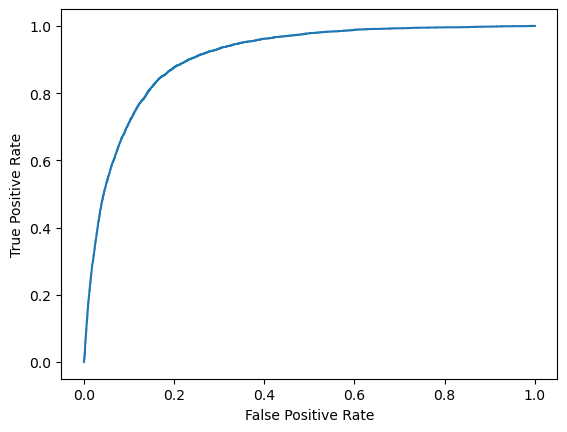

In [60]:
pred_prob1 = clf1.predict_proba(x1)[:,1]
fpr1, tpr1, thresholds1 = roc_curve(y, pred_prob1)
print('Area under the curve is', roc_auc_score(y, pred_prob1).round(3))

plt.plot(fpr1, tpr1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Model 3 - Drop pdays, previous, campaign, and duration

In [42]:
x2 = x.drop(['pdays', 'previous', 'campaign', 'duration'], 1)

C:\Users\harivars\AppData\Local\Temp\ipykernel_9100\2851158360.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x2 = x.drop(['pdays', 'previous', 'campaign', 'duration'], 1)


In [43]:
x2.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_telephone',
       'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [44]:
clf2 = LogisticRegression()
clf2.fit(x2, y)

LogisticRegression()

In [45]:
print(confusion_matrix(y, clf2.predict(x2)))
print('\n')
print(accuracy_score(y, clf2.predict(x2)).round(3))
print('\n')
print(classification_report(y, clf2.predict(x2)))

[[39402   520]
 [ 4343   946]]


0.892


              precision    recall  f1-score   support

           0       0.90      0.99      0.94     39922
           1       0.65      0.18      0.28      5289

    accuracy                           0.89     45211
   macro avg       0.77      0.58      0.61     45211
weighted avg       0.87      0.89      0.86     45211



Area under the curve is 0.764


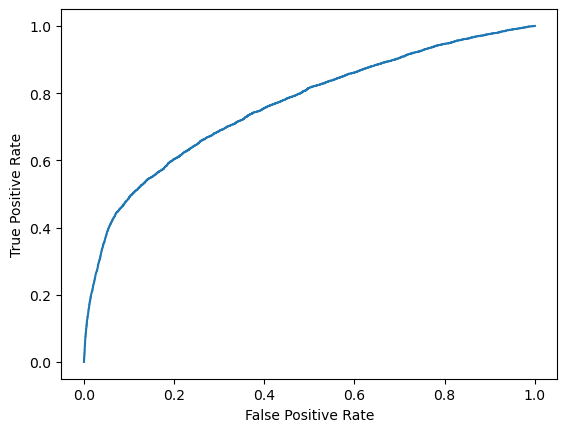

In [61]:
pred_prob2 = clf2.predict_proba(x2)[:,1]
fpr, tpr, thresholds2 = roc_curve(y, pred_prob2)
print('Area under the curve is', roc_auc_score(y, pred_prob2).round(3))

plt.plot(fpr2, tpr2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### From the above models, we can observe that dropping the campaign and duration brought a high amount of change and it reduced the roc curve area and accuracy as well. So we can proceed with the model 2 in which we just dropped the pdays and previous columns.

### To get the best threshold value

In [63]:
accuracy_ls = []
for thres in thresholds1:
    y_pred = np.where(clf1.predict_proba(x1)[:,1]>thres,1,0)
    accuracy_ls.append(accuracy_score(y, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds1), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls 

,thresholds,accuracy
1727,0.389895,0.903984
1720,0.391420,0.903984
1719,0.391488,0.903984
1729,0.389717,0.903961
1731,0.389372,0.903961
...,...,...
6215,0.002920,0.124903
6216,0.002911,0.124881
6217,0.002876,0.124660
6218,0.002869,0.124638


In [64]:
from numpy import argmax
J = tpr1 - fpr1
ix = argmax(J)
best_thresh = thresholds1[ix]
print('Best Threshold=%f' % (best_thresh)) 

Best Threshold=0.100001


In [65]:
threshold = 0.100001
preds = np.where(clf1.predict_proba(x1)[:,1] > threshold, 1, 0)
print(classification_report(y,preds))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89     39922
           1       0.38      0.87      0.53      5289

    accuracy                           0.82     45211
   macro avg       0.68      0.84      0.71     45211
weighted avg       0.91      0.82      0.85     45211



### We can see that the accuracy dropped from 0.908 to 0.82 but the other metrics improved a lot for this threshold value.